# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [169]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

countries = []
city_list = []
lat = []
long = []
date = []
temp_high = []
temp_low = []
wind_speed = []
humidity = []
cloud_cover = []

counter = 1

for city in cities:
    try:
        city_url = query_url + city.replace(" ","+")
        city_response = requests.get(city_url)
        city_response.raise_for_status()
        response = city_response.json()
        print(f"Processing Record # {counter} | {city}")
        countries.append(response['sys']['country'])
        city_list.append(city)
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lat'])
        date.append(response['dt'])
        temp_high.append(response['main']['temp_max'])
        temp_low.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloud_cover.append(response['clouds']['all'])
        
    except requests.HTTPError as exception:
        print("City not found. Skipping request.")
    counter += 1
print("Data API Retrieval Complete")
        


Processing Record # 1 | kapaa
Processing Record # 2 | east london
Processing Record # 3 | mataura
Processing Record # 4 | ushuaia
City not found. Skipping request.
Processing Record # 6 | georgetown
Processing Record # 7 | rikitea
Processing Record # 8 | santa marta
City not found. Skipping request.
City not found. Skipping request.
Processing Record # 11 | almere
Processing Record # 12 | windhoek
Processing Record # 13 | bilibino
Processing Record # 14 | talnakh
Processing Record # 15 | albany
City not found. Skipping request.
City not found. Skipping request.
Processing Record # 18 | akdepe
Processing Record # 19 | petropavlovsk-kamchatskiy
Processing Record # 20 | bambous virieux
City not found. Skipping request.
Processing Record # 22 | punta arenas
Processing Record # 23 | cururupu
Processing Record # 24 | aswan
Processing Record # 25 | dong xoai
Processing Record # 26 | airai
Processing Record # 27 | puerto ayora
Processing Record # 28 | swift current
Processing Record # 29 | tra

Processing Record # 236 | katsuura
Processing Record # 237 | rio gallegos
Processing Record # 238 | beyneu
Processing Record # 239 | zhangye
Processing Record # 240 | mega
City not found. Skipping request.
Processing Record # 242 | tigzirt
Processing Record # 243 | itoman
Processing Record # 244 | dwarka
City not found. Skipping request.
City not found. Skipping request.
Processing Record # 247 | mount isa
Processing Record # 248 | muroto
Processing Record # 249 | severo-kurilsk
Processing Record # 250 | harlingen
Processing Record # 251 | guacui
Processing Record # 252 | oranjestad
Processing Record # 253 | ostrovnoy
Processing Record # 254 | khirkiya
Processing Record # 255 | salalah
Processing Record # 256 | chara
Processing Record # 257 | griffith
Processing Record # 258 | olafsvik
Processing Record # 259 | adwa
Processing Record # 260 | srednekolymsk
Processing Record # 261 | banjar
Processing Record # 262 | soyo
Processing Record # 263 | bilma
Processing Record # 264 | lima
Proce

Processing Record # 470 | laguna
Processing Record # 471 | yumen
Processing Record # 472 | bonaventure
Processing Record # 473 | businga
Processing Record # 474 | nueva loja
Processing Record # 475 | erdenet
Processing Record # 476 | resistencia
Processing Record # 477 | eenhana
Processing Record # 478 | son la
Processing Record # 479 | nova olimpia
Processing Record # 480 | andros
Processing Record # 481 | sars
Processing Record # 482 | namibe
Processing Record # 483 | quesnel
Processing Record # 484 | wana
Processing Record # 485 | hun
Processing Record # 486 | springfield
Processing Record # 487 | oranjemund
Processing Record # 488 | namwala
Processing Record # 489 | harrisburg
Processing Record # 490 | waingapu
Processing Record # 491 | port lincoln
Processing Record # 492 | birur
Processing Record # 493 | hami
Processing Record # 494 | davila
Processing Record # 495 | ignacio zaragoza
Processing Record # 496 | belmonte
Processing Record # 497 | gonda
Processing Record # 498 | vall

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_dict = {'Country':countries,
                'City':city_list,
                'Latitude':lat,
                'Longitude':long,
                'Date':date,
                'Max Temperature':temp_high,
                'Min Temperature':temp_low,
                'Wind Speed':wind_speed,
                'Humidity':humidity,
                'Cloudiness':cloud_cover}

weather_df = pd.DataFrame(weather_dict)
weather_df

,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
0,US,kapaa,22.0752,22.0752,1639826241,24.18,20.99,0.45,82,8
1,ZA,east london,-33.0153,-33.0153,1639826289,23.52,23.52,10.80,53,20
2,NZ,mataura,-46.1927,-46.1927,1639826439,13.04,13.04,1.38,71,100
3,AR,ushuaia,-54.8000,-54.8000,1639826439,10.81,10.81,0.00,76,0
4,MY,georgetown,5.4112,5.4112,1639826440,26.96,25.97,0.45,82,40
...,...,...,...,...,...,...,...,...,...,...
579,ID,amahai,-3.3333,-3.3333,1639826596,27.25,27.25,0.62,80,48
580,RE,saint-pierre,-21.3393,-21.3393,1639826596,30.82,28.49,7.72,66,75
581,RU,golyshmanovo,56.3979,56.3979,1639826596,-12.69,-12.69,0.90,100,79
582,CM,rey bouba,8.6724,8.6724,1639826597,32.91,32.91,1.71,15,86


In [187]:
weather_df.to_csv('Weather_Data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
weather_df.describe()

,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
count,584.000000,584.000000,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000
mean,20.493708,20.493708,1.639827e+09,11.275771,10.518921,3.580000,73.018836,62.743151
std,32.488276,32.488276,7.778653e+01,17.633456,17.736104,2.638604,21.779056,37.642524
min,-54.800000,-54.800000,1.639826e+09,-45.510000,-45.510000,0.000000,9.000000,0.000000
25%,-6.225025,-6.225025,1.639826e+09,1.917500,0.187500,1.540000,62.000000,21.750000
50%,22.622500,22.622500,1.639827e+09,17.085000,16.400000,2.800000,77.000000,75.000000
75%,47.708275,47.708275,1.639827e+09,25.015000,24.940000,5.140000,90.000000,99.000000
max,78.218600,78.218600,1.639827e+09,35.030000,35.030000,15.200000,100.000000,100.000000


In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

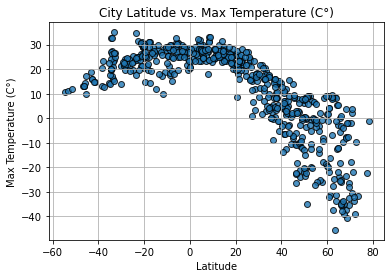

In [186]:
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title('City Latitude vs. Max Temperature (C°)')
plt.grid()
plt.savefig("Images/City Latitude vs. Max Temperature (C°).png")

## Latitude vs. Humidity Plot

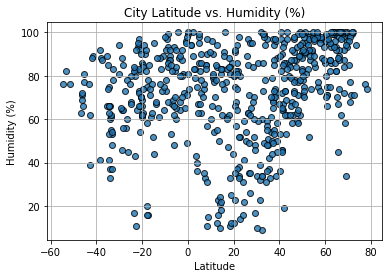

In [171]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.savefig("Images/City Latitude vs. Humidity (%).png")

## Latitude vs. Cloudiness Plot

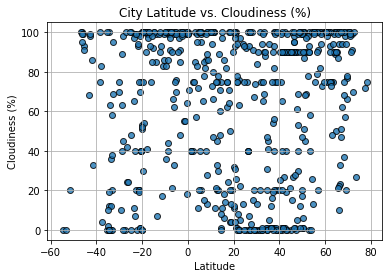

In [172]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')
plt.grid()
plt.savefig("Images/City Latitude vs. Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

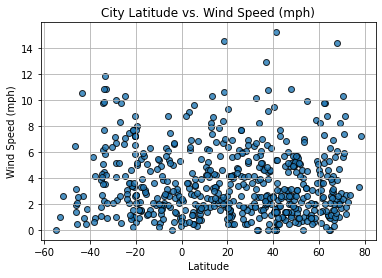

In [173]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid()
plt.savefig("Images/City Latitude vs. Wind Speed (mph).png")

## Linear Regression

In [174]:
northern_hemisphere = weather_df.loc[(weather_df['Latitude']>0)]
southern_hemisphere = weather_df.loc[(weather_df['Latitude']<0)]

northern_hemisphere_df = pd.DataFrame(northern_hemisphere)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

northern_hemisphere.head()

,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
0,US,kapaa,22.0752,22.0752,1639826241,24.18,20.99,0.45,82,8
4,MY,georgetown,5.4112,5.4112,1639826440,26.96,25.97,0.45,82,40
6,CO,santa marta,11.2408,11.2408,1639826441,24.84,24.84,6.20,77,100
7,NL,almere,52.3703,52.3703,1639826442,8.92,6.03,2.17,83,78
9,RU,bilibino,68.0546,68.0546,1639826442,-37.51,-37.51,1.99,98,37


In [175]:
southern_hemisphere.head()

,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
1,ZA,east london,-33.0153,-33.0153,1639826289,23.52,23.52,10.80,53,20
2,NZ,mataura,-46.1927,-46.1927,1639826439,13.04,13.04,1.38,71,100
3,AR,ushuaia,-54.8000,-54.8000,1639826439,10.81,10.81,0.00,76,0
5,PF,rikitea,-23.1203,-23.1203,1639826440,24.14,24.14,7.48,80,99
8,NA,windhoek,-22.5594,-22.5594,1639826442,31.27,29.11,3.60,11,20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Max Temperature is: -0.84
The r-squared value is: -0.7055999999999999


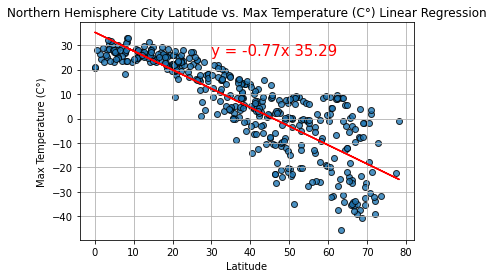

In [176]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression')
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,26),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Max Temperature'])
print(f"The correlation between Northern Hemisphere City Latitude and Max Temperature is: {round(correlation[0],2)}")
print(f"The r-squared value is: {-0.84**2}")

plt.savefig("Images/Northern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Max Temperature is: 0.51
The r-squared value is: 0.2601


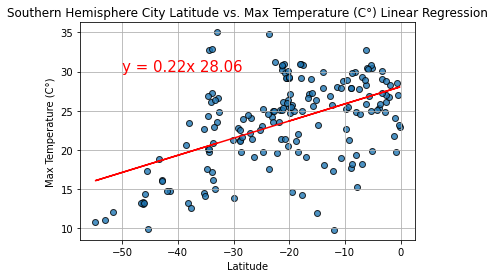

In [177]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression')
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Max Temperature'])
print(f"The correlation between Southern Hemisphere City Latitude and Max Temperature is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.51**2}")

plt.savefig("Images/Southern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Humidity is: 0.38
The r-squared value is: 0.1444


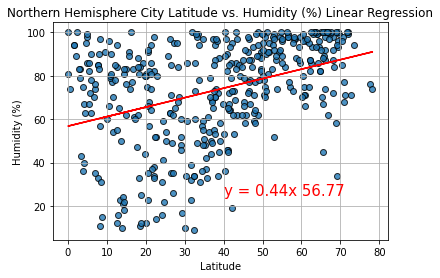

In [178]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity (%) Linear Regression')
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Humidity'])
print(f"The correlation between Northern Hemisphere City Latitude and Humidity is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.38**2}")

plt.savefig("Images/Northern Hemisphere City Latitude vs. Humidity (%) Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Humidity is: 0.22
The r-squared value is: 0.0484


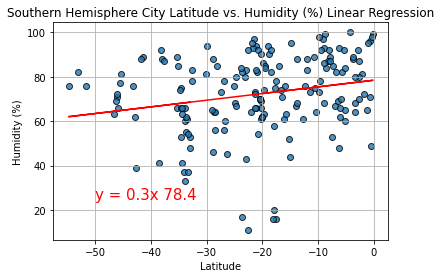

In [179]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity (%) Linear Regression')
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Humidity'])
print(f"The correlation between Southern Hemisphere City Latitude and Humidity is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.22**2}")

plt.savefig("Images/Southern Hemisphere City Latitude vs. Humidity (%) Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Cloudiness is: 0.19
The r-squared value is: 0.1444


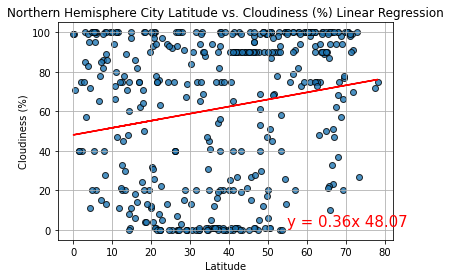

In [180]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression')
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,2),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Cloudiness'])
print(f"The correlation between Northern Hemisphere City Latitude and Cloudiness is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.38**2}")

plt.savefig("Images/Northern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Cloudiness is: 0.34
The r-squared value is: 0.11560000000000002


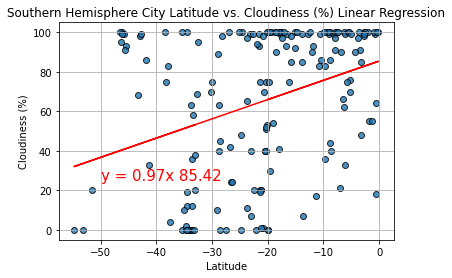

In [181]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression')
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Cloudiness'])
print(f"The correlation between Southern Hemisphere City Latitude and Cloudiness is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.34**2}")

plt.savefig("Images/Southern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Wind Speed is: -0.03
The r-squared value is: -0.0009


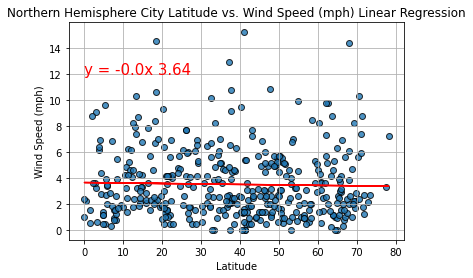

In [183]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression')
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Wind Speed'])
print(f"The correlation between Northern Hemisphere City Latitude and Wind Speed is: {round(correlation[0],2)}")
print(f"The r-squared value is: {-0.03**2}")

plt.savefig("Images/Northern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Wind Speed is: -0.11
The r-squared value is: -0.0121


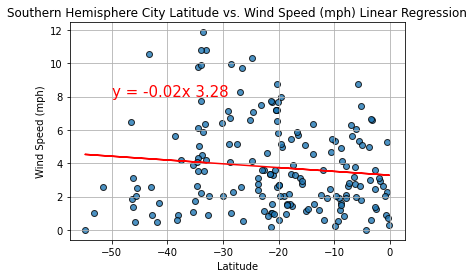

In [184]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression')
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Wind Speed'])
print(f"The correlation between Southern Hemisphere City Latitude and Wind Speed is: {round(correlation[0],2)}")
print(f"The r-squared value is: {-0.11**2}")

plt.savefig("Images/Southern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression.png")